In [ ]:
import numpy as np

file_path = '/content/perecos_phasi.txt'

with open(file_path, 'r', encoding='latin1') as file:
    content = file.readlines()

for index, line in enumerate(content):
    if line.strip() and line.split()[0].replace('.', '', 1).isdigit():
        data_start_index = index
        break

second_column_data = []
for line in content[data_start_index:]:
    parts = line.strip().split(';')
    if len(parts) > 1:
        second_column_data.append(float(parts[1]))

second_column_array = np.array(second_column_data)

reshaped_array = second_column_array.reshape(-1, 1)



In [ ]:
second_column_array.shape

(50000,)

In [ ]:
reshaped_array.shape

(50000, 1)

In [ ]:
import numpy as np

file_path = '/content/state_dict_results.npy'

array = np.load(file_path)

array.shape

(50000, 1)

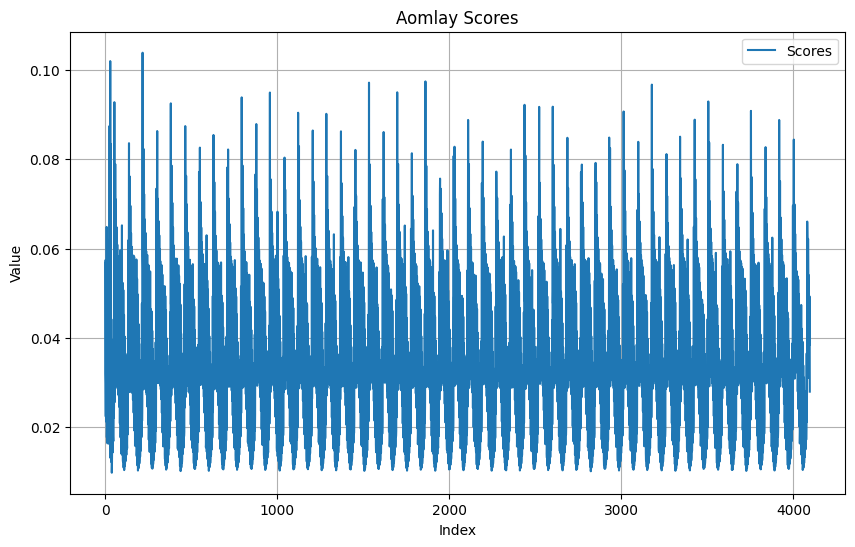

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

file_path = '/content/good data res.npy'
data = np.load(file_path)

plt.figure(figsize=(10, 6))
plt.plot(data, label='Scores')
plt.title('Aomlay Scores')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


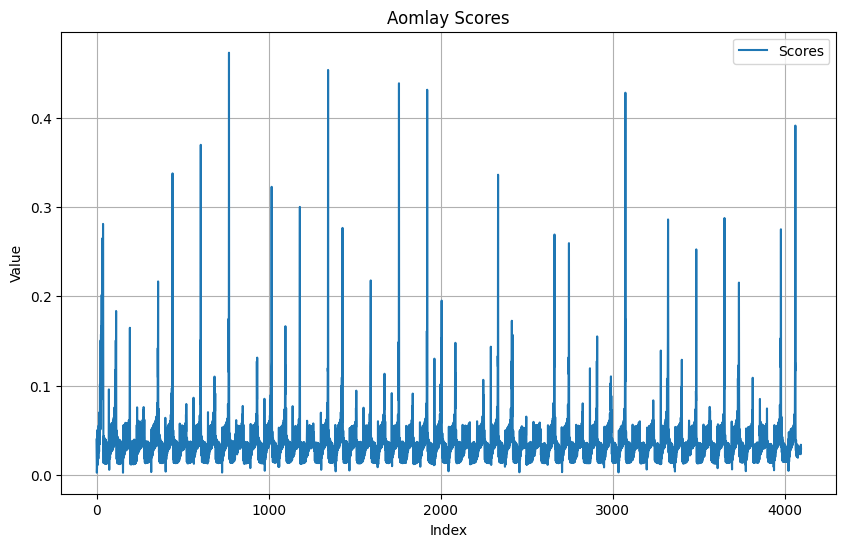

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

file_path = '/content/bad data res.npy'
data = np.load(file_path)

plt.figure(figsize=(10, 6))
plt.plot(data, label='Scores')
plt.title('Aomlay Scores')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
data.shape

(4096, 1)

In [ ]:
file_path = '/content/state_dict_results.npy'
data = np.load(file_path)

In [ ]:
data.shape

(60000, 1)

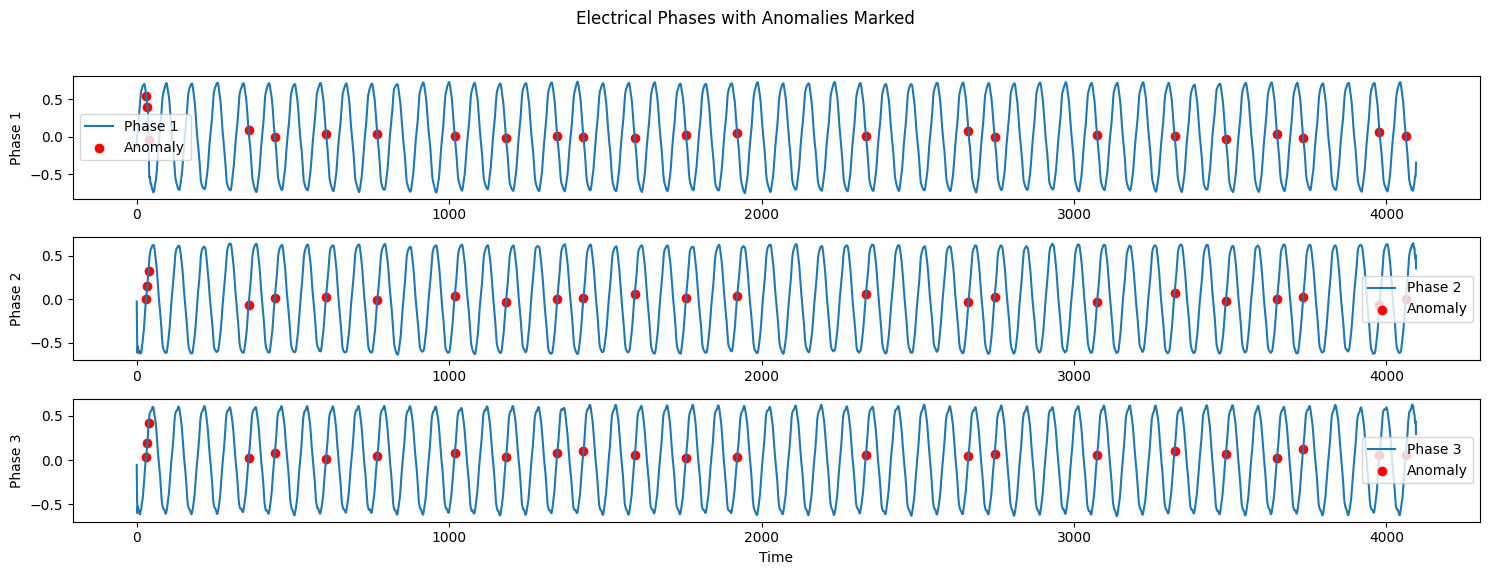

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ts_data = pd.read_csv('/content/big_new_liman_BAD_dataset.csv')
anomaly_scores = np.load('/content/bad data res.npy')
threshold = 0.2

anomaly_indices = np.where(anomaly_scores > threshold)[0]

plt.figure(figsize=(15, 6))

for i in range(3):
    plt.subplot(3, 1, i + 1)
    plt.plot(ts_data.iloc[:, i], label=f'Phase {i+1}')

    plt.scatter(anomaly_indices, ts_data.iloc[anomaly_indices, i], color='red', label='Anomaly')

    plt.ylabel(f'Phase {i+1}')
    plt.legend()

plt.xlabel('Time')
plt.suptitle('Electrical Phases with Anomalies Marked')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

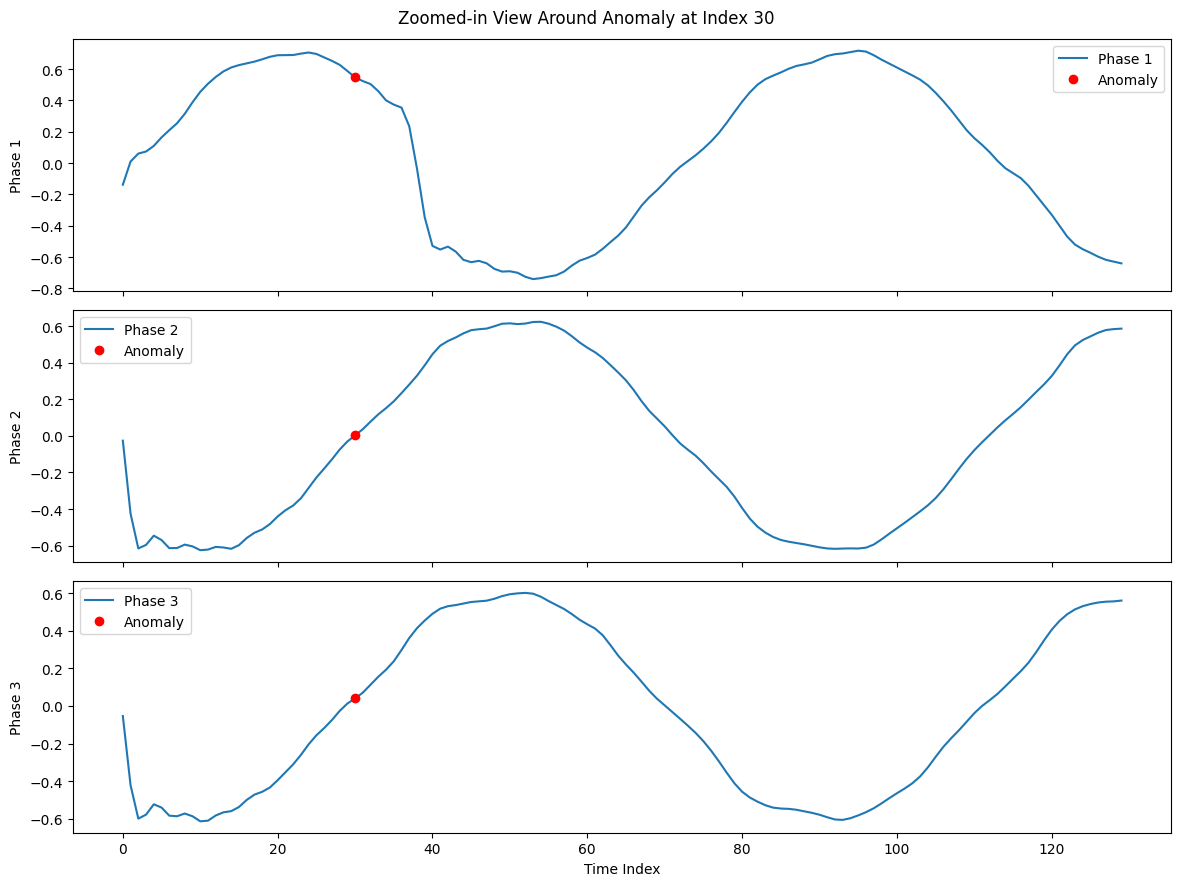

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ts_data = pd.read_csv('/content/big_new_liman_BAD_dataset.csv')
anomaly_scores = np.load('/content/bad data res.npy')

threshold = 0.2

anomaly_indices = np.where(anomaly_scores > threshold)[0]

window_size = 100

for anomaly_index in anomaly_indices:
    start_range = max(anomaly_index - window_size, 0)
    end_range = min(anomaly_index + window_size, len(ts_data))

    adjusted_anomaly_index = anomaly_index

    fig, axes = plt.subplots(3, 1, figsize=(12, 9), sharex=True)

    for i, ax in enumerate(axes):
        ax.plot(ts_data.iloc[start_range:end_range].index, ts_data.iloc[start_range:end_range, i], label=f'Phase {i+1}')
        ax.plot(adjusted_anomaly_index, ts_data.iloc[anomaly_index, i], 'ro', label='Anomaly')
        ax.set_ylabel(f'Phase {i+1}')
        ax.legend()

    plt.xlabel('Time Index')
    plt.suptitle(f'Zoomed-in View Around Anomaly at Index {anomaly_index}')
    plt.tight_layout()
    plt.show()

    break